In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm  # http://www.statsmodels.org/stable/index.html

nsample = 20
x = np.linspace(0, 10, nsample)
x

C:\Users\LOMO\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


array([  0.        ,   0.52631579,   1.05263158,   1.57894737,
         2.10526316,   2.63157895,   3.15789474,   3.68421053,
         4.21052632,   4.73684211,   5.26315789,   5.78947368,
         6.31578947,   6.84210526,   7.36842105,   7.89473684,
         8.42105263,   8.94736842,   9.47368421,  10.        ])

#### 一元线性回归

In [5]:
X = sm.add_constant(x)  # 加一列1，第二列是实际值
X

array([[  1.        ,   0.        ],
       [  1.        ,   0.52631579],
       [  1.        ,   1.05263158],
       [  1.        ,   1.57894737],
       [  1.        ,   2.10526316],
       [  1.        ,   2.63157895],
       [  1.        ,   3.15789474],
       [  1.        ,   3.68421053],
       [  1.        ,   4.21052632],
       [  1.        ,   4.73684211],
       [  1.        ,   5.26315789],
       [  1.        ,   5.78947368],
       [  1.        ,   6.31578947],
       [  1.        ,   6.84210526],
       [  1.        ,   7.36842105],
       [  1.        ,   7.89473684],
       [  1.        ,   8.42105263],
       [  1.        ,   8.94736842],
       [  1.        ,   9.47368421],
       [  1.        ,  10.        ]])

构造数据： 满足$$y=\beta_{0}+\beta_{1}x$$

In [4]:
#β0,β1分别设置成2,5
beta = np.array([2, 5])  
beta

array([2, 5])

In [3]:
#构造误差项
e = np.random.normal(size=nsample)
e

array([ 0.2449127 , -0.63948048,  0.45911851, -0.8443307 ,  0.90021202,
        0.86334251, -1.44393351,  2.28847964,  0.31140797, -0.41999292,
       -0.41761142, -1.25789282, -0.58429827,  0.82416762,  0.62698939,
       -0.1424073 , -0.68236397, -0.0596876 , -0.69532797, -0.58686587])

In [15]:
#实际值y
# beta等于array([2, 5])，np.dot是矩阵乘法，beta实际应该等于np.array([[2],[5]]),
# 最后返回一个20行1列的矩阵，但是由于beda.shape未（2，），所以实际上也能进行矩阵运算
# 结果的shape为（20，）
y = np.dot(X, beta) + e
print(y.shape)
y

(20,)


array([  2.2449127 ,   3.99209846,   7.7222764 ,   9.05040614,
        13.42652781,  16.02123725,  16.34554017,  22.70953227,
        23.36403954,  25.2642176 ,  27.89817805,  29.6894756 ,
        32.9946491 ,  37.03469393,  39.46909465,  41.33127691,
        43.42289918,  46.67715451,  48.67309309,  51.41313413])

In [16]:
#最小二乘法
model = sm.OLS(y,X)

In [17]:
#拟合数据
res = model.fit()

In [18]:
#回归系数
res.params

array([ 2.21735343,  4.94397369])

In [19]:
#全部结果
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     5638.
Date:                Fri, 10 Aug 2018   Prob (F-statistic):           6.22e-24
Time:                        21:06:12   Log-Likelihood:                -25.076
No. Observations:                  20   AIC:                             54.15
Df Residuals:                      18   BIC:                             56.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2174      0.385      5.758      0.000       1.408       3.026
x1             4.9440      0.066     75.088      0.000       4.806       5.082
==============================================================================
Omnibus:                        3.439   Durbin-Watson:                   2.454
Prob(Omnibus):                  0.179   Jarque-Bera (JB):                1.678
Skew:                           0.641   Prob(JB):                        0.432
Kurtosis:                       3.607   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

上表中的R-squared就是$R^2$值（判定系数）,Adj.R-squared为调整后的$R^2$值，适用于多元线性回归分析,Prob (F-statistic)为检验统计量的概率值，很小说明线性关系很强

第二张表是对两个回归系数的t检验，P>|t|很小，落入拒绝域，即拒绝原假设，认为有统计学意义

In [21]:
#拟合的估计值
y_ = res.fittedvalues
y_

array([  2.21735343,   4.81944484,   7.42153626,  10.02362767,
        12.62571909,  15.22781051,  17.82990192,  20.43199334,
        23.03408475,  25.63617617,  28.23826758,  30.840359  ,
        33.44245041,  36.04454183,  38.64663325,  41.24872466,
        43.85081608,  46.45290749,  49.05499891,  51.65709032])

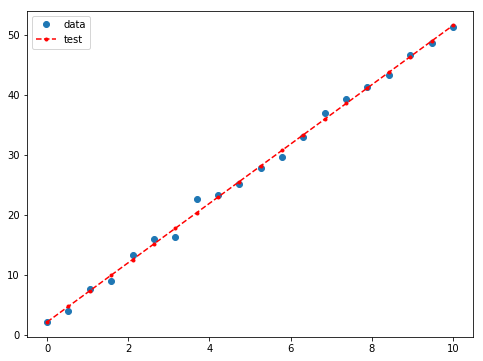

In [22]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')#原始数据
ax.plot(x, y_, 'r--.',label='test')#拟合数据
ax.legend(loc='best')
plt.show()

### 高阶回归

In [23]:
# Y=5+2⋅X+3⋅X^2
 
nsample = 50
x = np.linspace(0, 10, nsample)
X = np.column_stack((x, x**2))
X = sm.add_constant(X)

In [24]:
beta = np.array([5, 2, 3])
e = np.random.normal(size=nsample)
y = np.dot(X, beta) + e
model = sm.OLS(y,X)
results = model.fit()
results.params

array([ 4.66778644,  2.10740347,  2.9877896 ])

In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.085e+05
Date:                Fri, 10 Aug 2018   Prob (F-statistic):           1.67e-93
Time:                        21:20:15   Log-Likelihood:                -72.423
No. Observations:                  50   AIC:                             150.8
Df Residuals:                      47   BIC:                             156.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6678      0.433     10.774      0.000       3.796       5.539
x1             2.1074      0.200     10.517      0.000       1.704       2.511
x2             2.9878      0.019    154.189      0.000       2.949       3.027
==============================================================================
Omnibus:                        1.217   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.544   Jarque-Bera (JB):                0.488
Skew:                           0.023   Prob(JB):                        0.784
Kurtosis:                       3.482   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

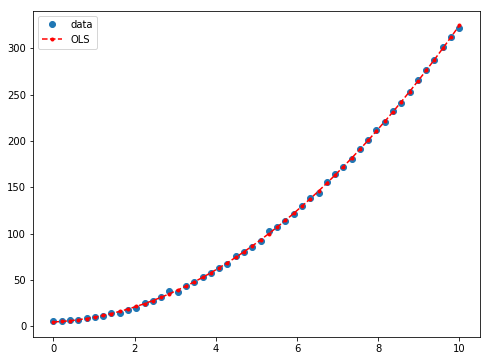

In [26]:
y_fitted = results.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')
ax.plot(x, y_fitted, 'r--.',label='OLS')
ax.legend(loc='best')
plt.show()

#### 分类变量

假设分类变量有4个取值（a,b,c）,比如考试成绩有3个等级。那么a就是（1,0,0），b（0,1,0），c(0,0,1),这个时候就需要3个系数β0,β1,β2，也就是β0x0+β1x1+β2x2

In [27]:
nsample = 50
groups = np.zeros(nsample,int)
groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [28]:
groups[20:40] = 1
groups[40:] = 2
dummy = sm.categorical(groups, drop=True)
dummy

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.

In [29]:
# Y=5+2X+3Z1+6⋅Z2+9⋅Z3.
 
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, dummy))
X = sm.add_constant(X)
beta = [5, 2, 3, 6, 9]
e = np.random.normal(size=nsample)
y = np.dot(X, beta) + e
result = sm.OLS(y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     3558.
Date:                Fri, 10 Aug 2018   Prob (F-statistic):           1.94e-54
Time:                        21:27:48   Log-Likelihood:                -67.098
No. Observations:                  50   AIC:                             142.2
Df Residuals:                      46   BIC:                             149.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9519      0.547     14.539      0.000       6.851       9.053
x1             2.0212      0.063     32.120      0.000       1.895       2.148
x2            -0.4615      0.347     -1.331      0.190      -1.160       0.237
x3             2.5514      0.290      8.802      0.000       1.968       3.135
x4             5.8620      0.653      8.977      0.000       4.548       7.176
==============================================================================
Omnibus:                        0.879   Durbin-Watson:                   2.435
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.505
Skew:                          -0.244   Prob(JB):                        0.777
Kurtosis:                       3.063   Cond. No.                     1.28e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.16e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

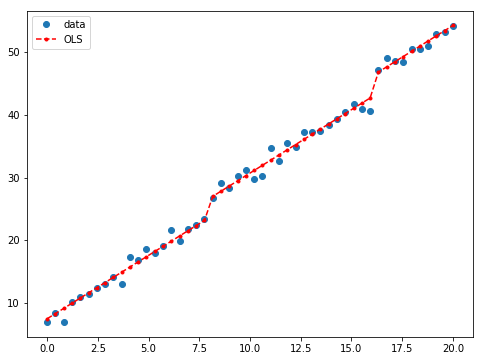

In [30]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="data")
ax.plot(x, result.fittedvalues, 'r--.', label="OLS")
ax.legend(loc='best')
plt.show()